# Background

- Zaber and NMR in place and region limits set yesterday. Started 10 x 10 x 10 grid, but the magnet tripped early in the measurment.
- Now ran a coarser 5 x 5 x 5 grid in the available space in the magnet gap.

# Imports

In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
%matplotlib inline

from plotting import config_plots

In [2]:
config_plots()

# Load Data

In [3]:
def load_data(file, pklname=None):
    with open(file, 'r') as f:
        firstline = f.readline().split(',')
        header = [e.strip(' ').strip('\n') for e in firstline]
    df = pd.read_csv(file, names=header, skiprows=1)
    # parse dates and set as index
    dates = [parser.parse(row.Time) for row in df.itertuples()]
    df['Datetime'] = pd.to_datetime(dates)
    df.sort_values(by=['Datetime'], inplace=True)
    df = df.set_index('Datetime')
    # calculate time since beginning in useful units
    df['seconds_delta'] = (df.index - df.index[0]).total_seconds()
    df['hours_delta'] = (df.index - df.index[0]).total_seconds()/60**2
    df['days_delta'] = (df.index - df.index[0]).total_seconds()/(24*60**2)
    # save to pickle
    if not pklname is None:
        df.to_pickle(pklname)
    return df

In [5]:
df = load_data('/home/ckampa/Dropbox/LogFiles/2021-06-11 074905.txt')
# df_slow = load_data('/home/ckampa/Dropbox/LogFiles/2021-06-11 074903slow.txt')

IndexError: index 0 is out of bounds for axis 0 with size 0

In [45]:
df

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Z,Zaber_Meas_Encoder_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,
2021-06-10 10:53:56,6/10/2021 10:53:56 AM,240.065217,30.574367,0.0,0.0,412701.0,202216.0,1467570.0,412701.0,161211.328125,202216.0,78990.6250,1467570.0,573269.53125,0.0,0.000000,0.000000
2021-06-10 10:54:11,6/10/2021 10:54:11 AM,240.065330,30.588433,0.0,0.0,412701.0,202216.0,1498390.0,412701.0,161211.328125,202216.0,78990.6250,1498390.0,585308.59375,15.0,0.004167,0.000174
2021-06-10 10:54:25,6/10/2021 10:54:25 AM,240.065330,30.602233,0.0,0.0,412701.0,202216.0,1529210.0,412701.0,161211.328125,202216.0,78990.6250,1529210.0,597347.65625,29.0,0.008056,0.000336
2021-06-10 10:54:40,6/10/2021 10:54:40 AM,240.065160,30.615933,0.0,0.0,412701.0,202216.0,1560030.0,412701.0,161211.328125,202216.0,78990.6250,1560030.0,609386.71875,44.0,0.012222,0.000509
2021-06-10 10:54:54,6/10/2021 10:54:54 AM,240.065273,30.629217,0.0,0.0,412701.0,202216.0,1590850.0,412701.0,161211.328125,202216.0,78990.6250,1590850.0,621425.78125,58.0,0.016111,0.000671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-10 17:27:14,6/10/2021 5:27:14 PM,-0.004793,-0.000005,0.0,0.0,547101.0,666916.0,1652490.0,547101.0,213711.328125,666916.0,260514.0625,1652490.0,645503.90625,23598.0,6.555000,0.273125
2021-06-10 17:27:28,6/10/2021 5:27:28 PM,-0.004736,-0.000005,0.0,0.0,547101.0,666916.0,1683310.0,547101.0,213711.328125,666916.0,260514.0625,1683310.0,657542.96875,23612.0,6.558889,0.273287
2021-06-10 17:27:43,6/10/2021 5:27:43 PM,-0.004763,-0.000004,0.0,0.0,547101.0,666916.0,1714130.0,547101.0,213711.328125,666916.0,260514.0625,1714130.0,669582.03125,23627.0,6.563056,0.273461


In [48]:
[len(df[f'Zaber_Pattern_{i}'].unique()) for i in ['X', 'Y', 'Z']]

[11, 11, 11]

# Plotting Functions

In [56]:
def plot_xplane(df, xval):
    xmin = df['Zaber_Meas_Encoder_X'].min()
    df_ = df.query(f'`Zaber_Pattern_X` == {xval}').copy()
    x_mm = df_['Zaber_Meas_Encoder_X'].values[0]
    ymin = df_['Zaber_Meas_Encoder_Y'].min()
    zmin = -df_['Zaber_Meas_Encoder_Z'].max()
    # plot
    fig, ax = plt.subplots()
    sc = ax.scatter(1e-3*(df_['Zaber_Meas_Encoder_Y']-ymin), 1e-3*(-df_['Zaber_Meas_Encoder_Z']+zmin),
                    c=df_['NMR [T]'], s=5)
    cb = fig.colorbar(sc, label='NMR [T]')
    ax.set_xlabel('Zaber Y [mm]')
    ax.set_ylabel('Zaber Z [mm]')
    fig.suptitle(f'Zaber X = {1e-3*(x_mm - xmin)} [mm]')
#     fig.suptitle(f'Zaber Encoder X = {xval} [ADC]')
    return fig, ax

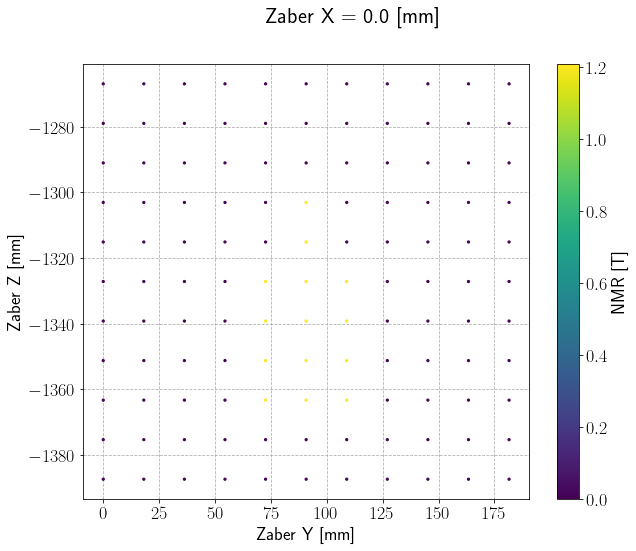

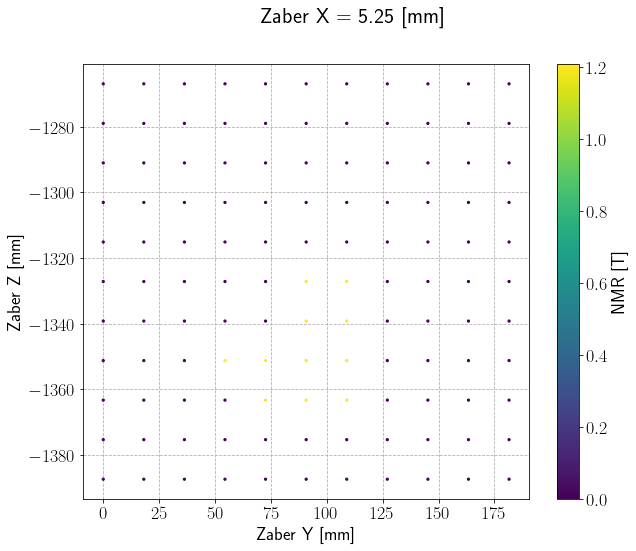

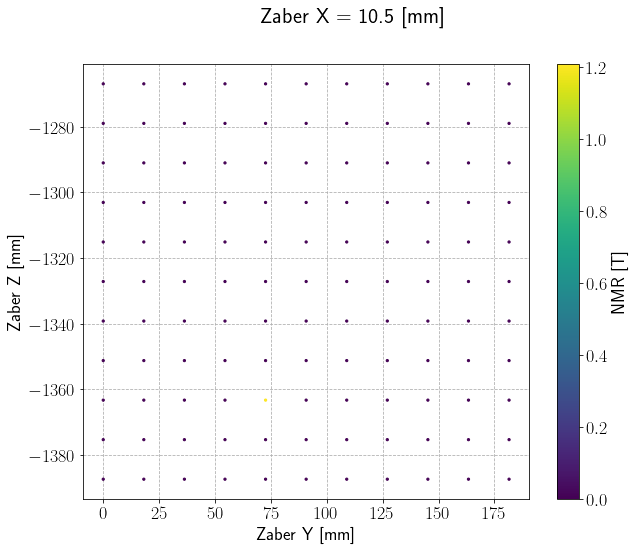

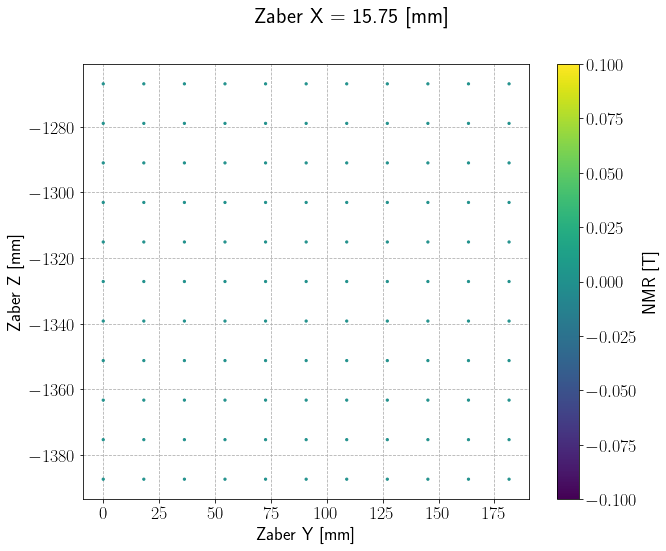

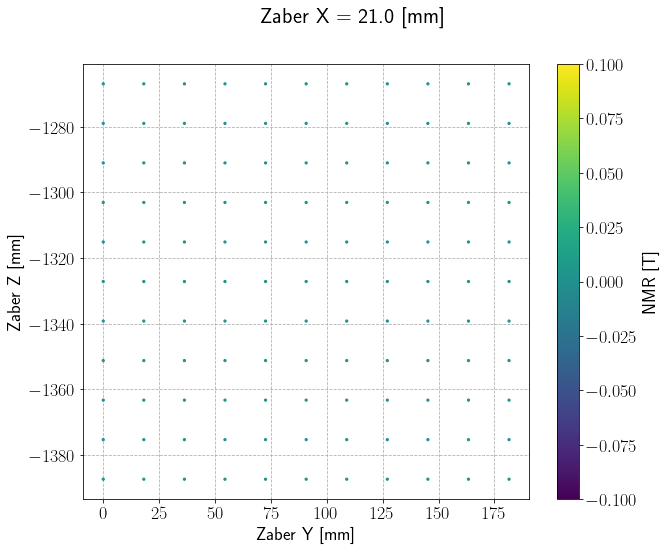

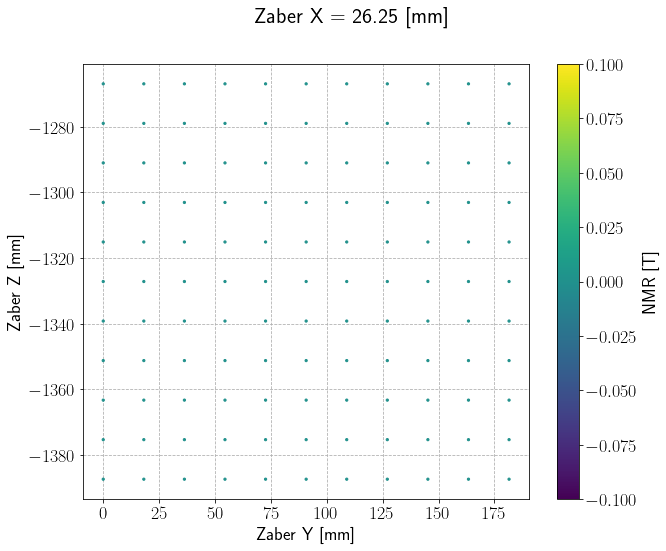

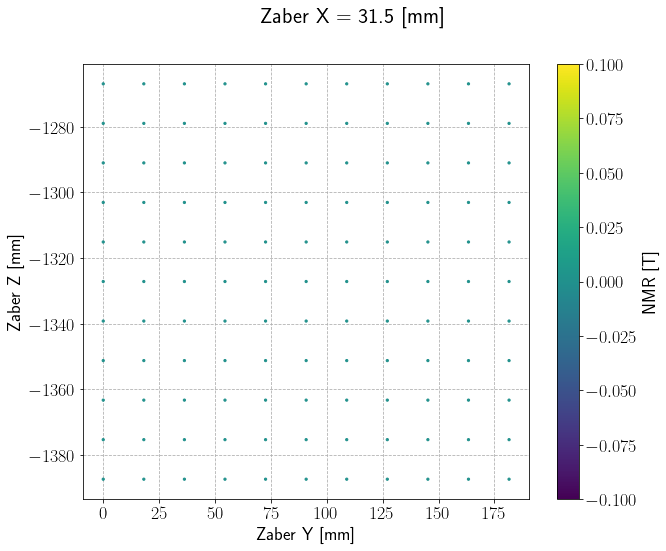

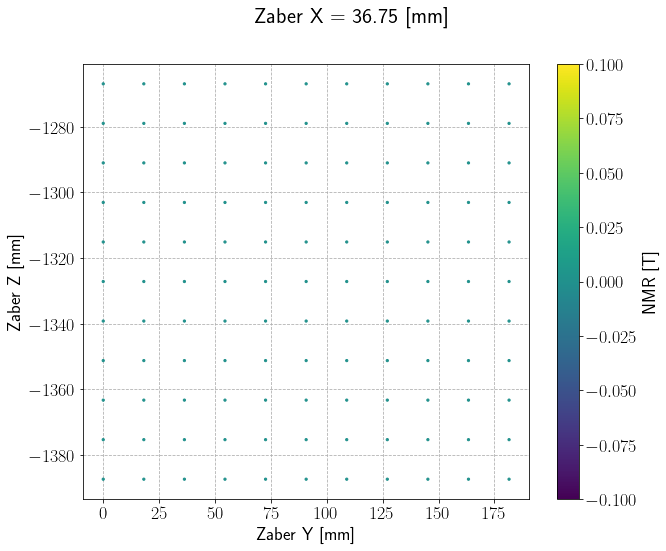

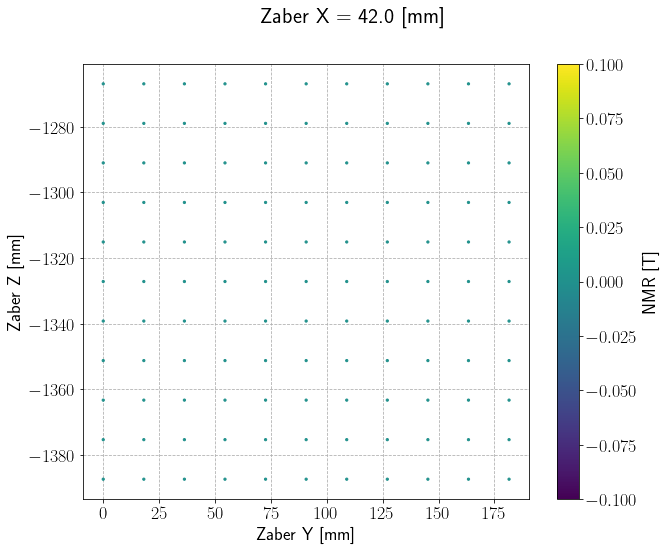

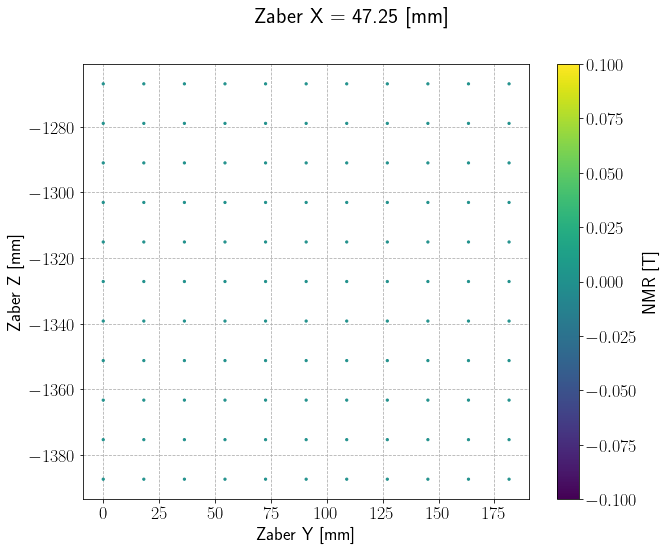

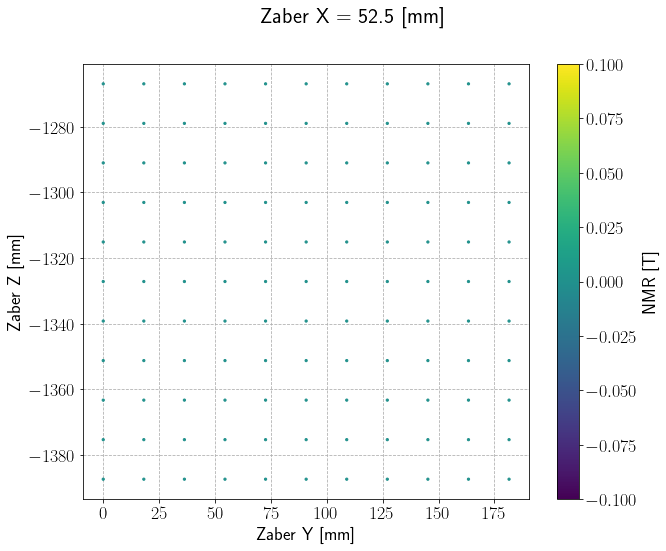

In [57]:
for xval in df['Zaber_Pattern_X'].unique():
    fig, ax = plot_xplane(df, xval)

In [53]:
df[df['NMR [T]'] > 0.7]

,Time,Magnet Current [V],Magnet Voltage [V],NMR [T],NMR [FFT],Zaber_Pattern_X,Zaber_Pattern_Y,Zaber_Pattern_Z,Zaber_Meas_Micron_X,Zaber_Meas_Encoder_X,Zaber_Meas_Micron_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_Micron_Z,Zaber_Meas_Encoder_Z,seconds_delta,hours_delta,days_delta
Datetime,,,,,,,,,,,,,,,,,
2021-06-10 11:07:54,6/10/2021 11:07:54 AM,240.064877,31.081633,1.207635,0.0,412701.0,388096.0,1621670.0,412701.0,161211.328125,388096.0,151600.00000,1621670.0,633464.84375,838.0,0.232778,0.009699
2021-06-10 11:08:10,6/10/2021 11:08:10 AM,240.064990,31.087533,1.207625,0.0,412701.0,388096.0,1652490.0,412701.0,161211.328125,388096.0,151600.00000,1652490.0,645503.90625,854.0,0.237222,0.009884
2021-06-10 11:08:27,6/10/2021 11:08:27 AM,240.064990,31.093350,1.207633,0.0,412701.0,388096.0,1683310.0,412701.0,161211.328125,388096.0,151600.00000,1683310.0,657542.96875,871.0,0.241944,0.010081
2021-06-10 11:08:44,6/10/2021 11:08:44 AM,240.065103,31.099033,1.207671,0.0,412701.0,388096.0,1714130.0,412701.0,161211.328125,388096.0,151600.00000,1714130.0,669582.03125,888.0,0.246667,0.010278
2021-06-10 11:11:08,6/10/2021 11:11:08 AM,240.064990,31.145167,1.207690,0.0,412701.0,434566.0,1560030.0,412701.0,161211.328125,434566.0,169752.34375,1560030.0,609386.71875,1032.0,0.286667,0.011944
2021-06-10 11:11:25,6/10/2021 11:11:25 AM,240.064933,31.150083,1.207617,0.0,412701.0,434566.0,1590850.0,412701.0,161211.328125,434566.0,169752.34375,1590850.0,621425.78125,1049.0,0.291389,0.012141
2021-06-10 11:11:42,6/10/2021 11:11:42 AM,240.064877,31.154900,1.207598,0.0,412701.0,434566.0,1621670.0,412701.0,161211.328125,434566.0,169752.34375,1621670.0,633464.84375,1066.0,0.296111,0.012338
2021-06-10 11:11:58,6/10/2021 11:11:58 AM,240.064933,31.159667,1.207589,0.0,412701.0,434566.0,1652490.0,412701.0,161211.328125,434566.0,169752.34375,1652490.0,645503.90625,1082.0,0.300556,0.012523
2021-06-10 11:12:15,6/10/2021 11:12:15 AM,240.064990,31.164283,1.207593,0.0,412701.0,434566.0,1683310.0,412701.0,161211.328125,434566.0,169752.34375,1683310.0,657542.96875,1099.0,0.305278,0.012720


In [31]:
header= load_data('/home/ckampa/Dropbox/LogFiles/2021-06-10 105002.txt')

In [32]:
header

['Time',
 'Magnet Current [V]',
 'Magnet Voltage [V]',
 'NMR [T]',
 'NMR [FFT]',
 'Zaber_Pattern_X',
 'Zaber_Pattern_Y',
 'Zaber_Pattern_Z',
 'Zaber_Meas_Micron_X',
 'Zaber_Meas_Encoder_X',
 'Zaber_Meas_Micron_Y',
 'Zaber_Meas_Encoder_Y',
 'Zaber_Meas_Micron_Z',
 'Zaber_Meas_Encoder_Z']

In [ ]:
 with open(file, 'rb') as f:
        header = [e.strip(' ') for e in f.readlines()[0]]

# Useful Functions